<a href="https://colab.research.google.com/github/sudhatisaipavan/23CSBTB27-28/blob/main/LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

Importing the Data Set Into Our Python Script

In [ ]:
raw_data = pd.read_csv('classified_data.csv')

In [ ]:
raw_data = pd.read_csv('classified_data.csv', index_col = 0)

In [ ]:
print(raw_data.columns)

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')


Standardizing the Data Set

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(raw_data.drop('TARGET CLASS', axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))

In [ ]:
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)

Splitting the Data Set Into Training Data and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = scaled_data

y = raw_data['TARGET CLASS']

In [ ]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

Training a K Nearest Neighbors Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(n_neighbors=1)

Making Predictions With Our K Nearest Neighbors Algorithm

In [ ]:
predictions = model.predict(x_test_data)

Measuring the Accuracy of Our Model

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [ ]:
# import the required modules
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a Logistic Regression model
model = LogisticRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# generate predictions on the test data
predictions = model.predict(X_test)

# print the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
print(confusion_matrix(y_test, predictions)) # changed y_test_data to y_test

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Choosing An Optimal K Value Using the Elbow Method

In [ ]:
error_rates = []

In [ ]:
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_training_data, y_training_data)

    new_predictions = new_model.predict(x_test_data)

    error_rates.append(np.mean(new_predictions != y_test_data))

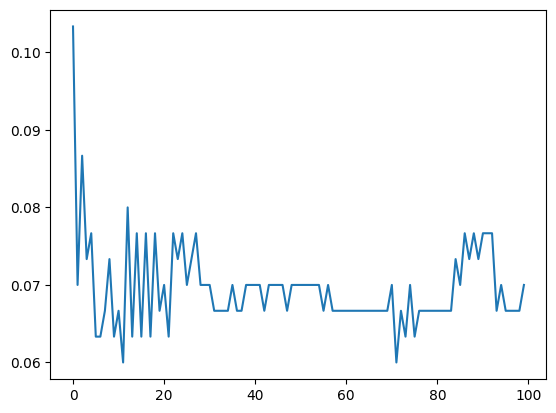

In [ ]:
plt.plot(error_rates)